# FER-2013 EDA

### Importing libraries

In [33]:
import pandas as pd
import os
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [8]:
! kaggle datasets download -d msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 90% 54.0M/60.3M [00:00<00:00, 71.4MB/s]
100% 60.3M/60.3M [00:01<00:00, 61.6MB/s]


In [9]:
! unzip fer2013

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

## Loading Dataset

In [11]:
train_dir = '/content/train/'
test_dir = '/content/test/'

row, col = 48, 48
classes = 7

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
print(train_count)
print(test_count)

       surprise  neutral   sad  angry  fear  happy  disgust
train      3171     4965  4830   3995  4097   7215      436
      surprise  neutral   sad  angry  fear  happy  disgust
test       831     1233  1247    958  1024   1774      111


### Plotting of number of images in training set

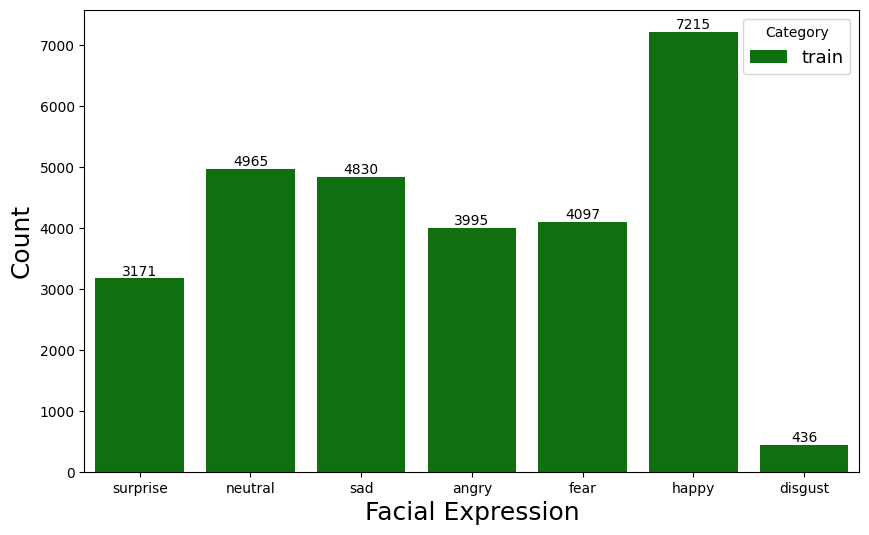

In [69]:
# Transposing the DataFrame
transposed_train_count = train_count.transpose()

# Converting the transposed DataFrame to long-form format
long_form1 = transposed_train_count.reset_index().melt(id_vars='index', var_name='Category', value_name='Count')

# Plotting the data using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=long_form1, x='index', y='Count', hue='Category',palette=['green'] )

# Adding count values at the top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge')

plt.xlabel('Facial Expression',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.legend(title='Category', fontsize=13)
plt.show()

# Saving the plot as a png file
plt.savefig('Trainset_count.png')  

### Plotting of number of images in test set

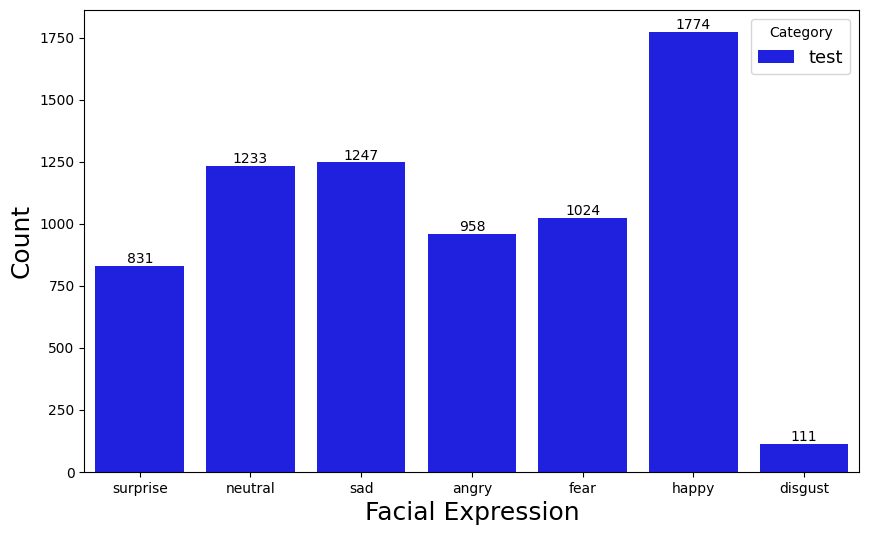

In [68]:
# Transposing the DataFrame
transposed_test_count = test_count.transpose()

# Converting the transposed DataFrame to long-form format
long_form2 = transposed_test_count.reset_index().melt(id_vars='index', var_name='Category', value_name='Count')

# Plot the data using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=long_form2, x='index', y='Count', hue='Category',palette=['blue'] )

# Adding count values at the top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge')

plt.xlabel('Facial Expression',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.legend(title='Category', fontsize=13)
plt.show()

# Saving the plot as a png file
plt.savefig('Testset_count.png')  

### Sample images from each categories

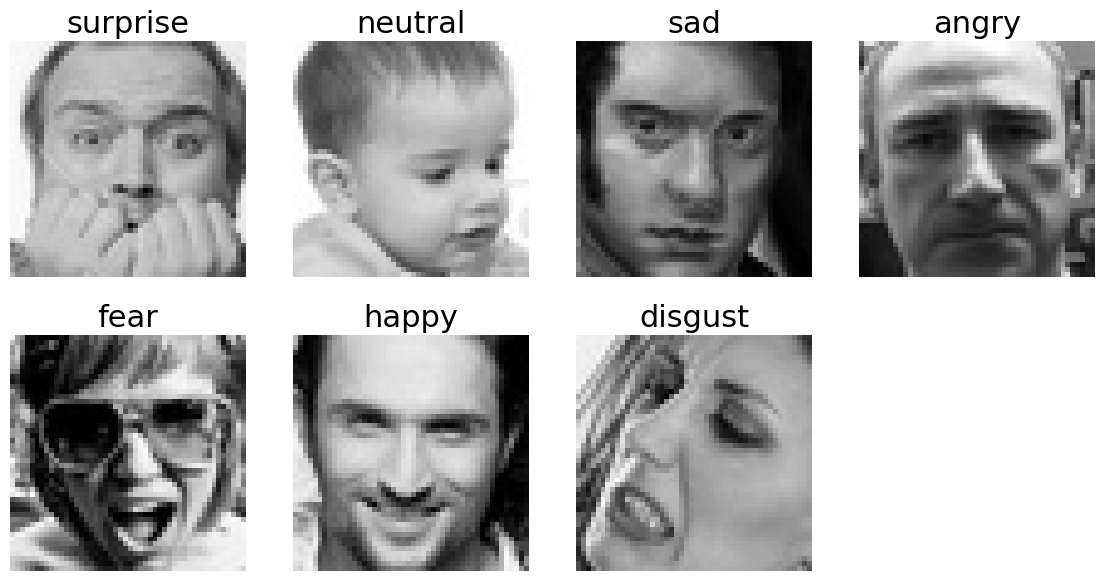

In [55]:
plt.figure(figsize=(14,7))
i = 1
for expression in os.listdir(train_dir):
    img = load_img((train_dir + expression +'/'+ os.listdir(train_dir + expression)[1]))
    plt.subplot(2,4,i)
    plt.imshow(img)
    plt.title(expression, fontsize=22)
    plt.axis('off')
    i += 1
plt.show()

# Saving the sample image as a png file
plt.savefig('sample_image.png') 